In [ ]:
import argparse
import os
import numpy as np
import math
import itertools
import time
import datetime
import sys

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

from models import *
from datasets import *

import torch.nn as nn
import torch.nn.functional as F
import torch

In [2]:
genpath = 'saved_models/facades/generator_60.pth'
#dispath = 'saved_models/facades/discriminator_60.pth'

generator = GeneratorUNet()
generator.load_state_dict(torch.load(genpath, map_location = 'cpu'))
generator.eval()
None

In [3]:
dataloader = DataLoader(
    ImageDataset(dirpath='labeler_output',mode = "test"),
    batch_size=1,
    shuffle=True,
    num_workers=0,
)

torch.Size([1, 4, 256, 256])
labeler_output/IMG_2836
(256, 256, 4)


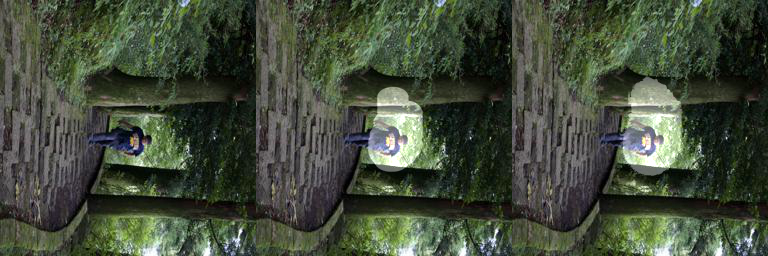

In [49]:
imgs = next(iter(dataloader))
imgin = Variable(imgs["imgin"].type(torch.Tensor))
print(imgin.shape)
genmask = generator(imgin)
path = imgs["path"]
# img_sample = torch.cat((imgin.data[:,0:3,:,:], 
#                         imgin.data[:,3:4,:,:].repeat(1,3,1,1)*255/imgin.max(), 
#                         genmask.data.repeat(1,3,1,1)*255,
#                        ),dim=3)
img_sample = torch.cat((imgin.data[:,0:3,:,:], 
                        (imgin.data[:,0:3,:,:]+imgin.data[:,3:4,:,:]*100/imgin.max()).clip(0,255), 
                        (imgin.data[:,0:3,:,:]+genmask.data*100).clip(0,255),
                       ),dim=3)

img_sample = np.array(img_sample[0,:,:,:].permute(1,2,0))
print(path[0])
problem = Image.open(path[0] + '.png')
print(np.array(problem).shape)

Image.fromarray(img_sample.astype('uint8'))

In [88]:
with torch.no_grad():
    output_mask = generator(imgin).numpy()

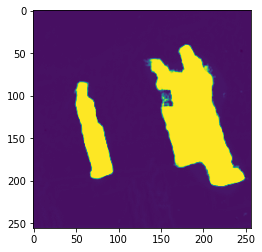

In [89]:
import matplotlib.pyplot as plt
plt.imshow(output_mask[0].squeeze())